In [204]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
def sorted_dict(d):
    ms = sorted(d.items() , reverse=True, key=lambda x: x[1])
    return ms

with open("C:/Users/Chafiaa/Downloads/Data620/facebook_combined.txt", 'r') as f:
    data = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph(), nodetype=int)

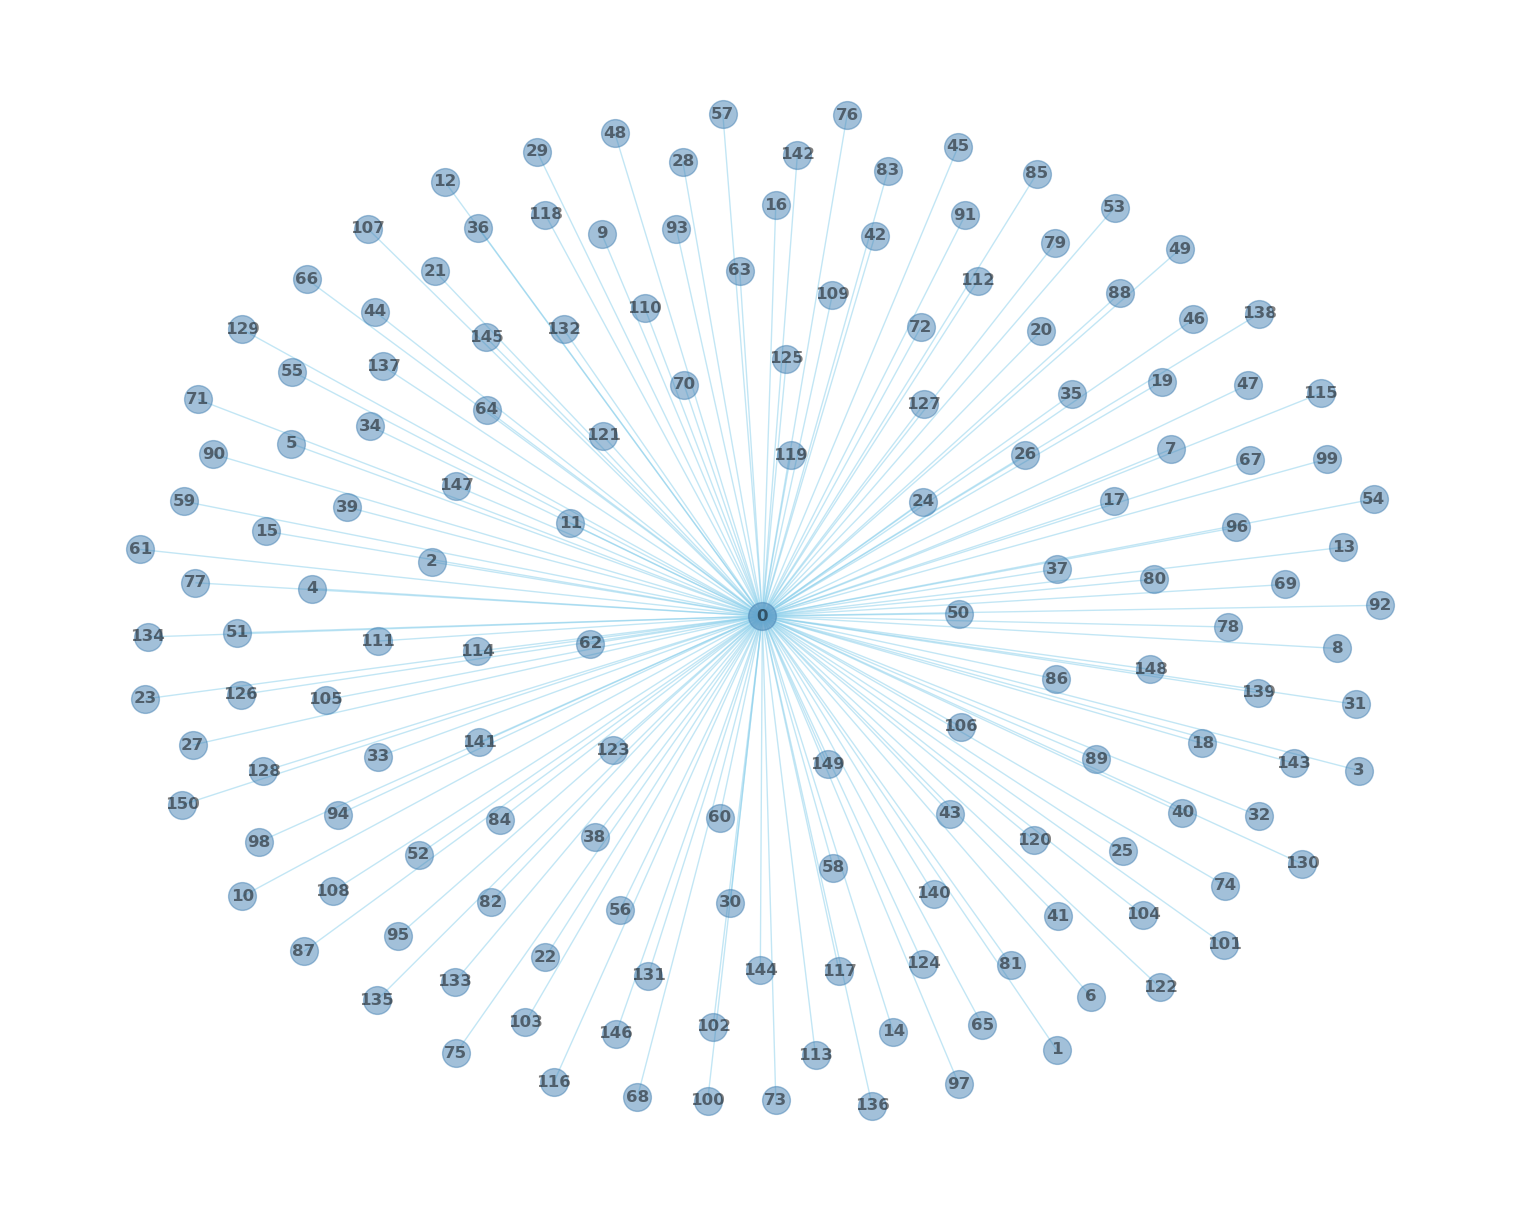

In [205]:
nx.draw(data, with_labels=True, node_color="steelblue", node_size=400, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

In [ ]:
## Metrics and Analysis
#1. Eccentricity, Radius, and Diameter

Text(0, 0.5, 'Frequency')

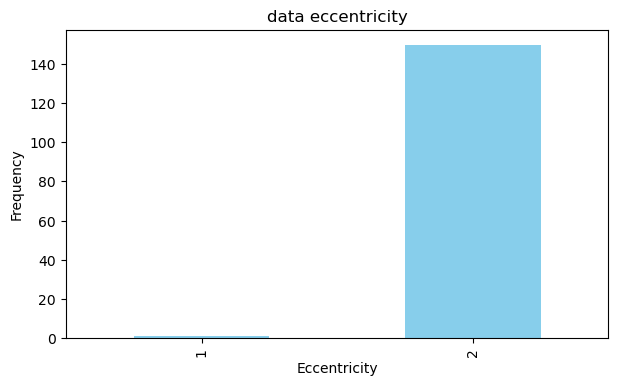

In [206]:
data_ecc = pd.DataFrame((nx.eccentricity(data).values()))[0].value_counts().sort_index()

plot = data_ecc.plot(kind='bar',
                        color = "skyblue",
                        figsize=(7,4),
                        title="data eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

In [208]:
nx.radius(data)

1

In [209]:
nx.diameter(data)

2

In [218]:
print(data)
Avr_degree=(150/151)*2
Avr_degree

Graph with 151 nodes and 150 edges


1.9867549668874172

In [221]:
# Degree centrality
d = nx.degree(data)

In [222]:
min(dict(d).values())

1

In [223]:
max(dict(d).values())

150

Text(0.5, 1.0, 'Distribution of Degrees in fb')

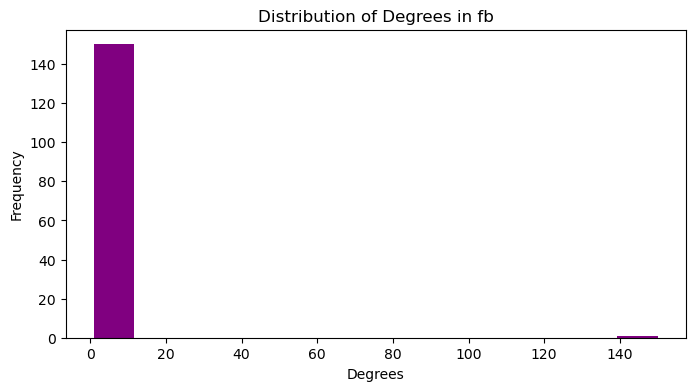

In [224]:
plt.figure(figsize=(8,4))
plt.hist(dict(d).values(), 14, color = "purple")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in fb')

#Graph heavly scwed to the left: 

In [225]:
# Find the top ten
ds = sorted_dict(dict(d))
ds[0:10]

[(0, 150),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [226]:
ds[-1]

(150, 1)

In [228]:
#Closeness Centrality
d_cc = nx.closeness_centrality(data)

In [240]:
# Find the top ten
d_cc_s = sorted_dict(d_cc)
d_cc_s[1:20]

[(1, 0.5016722408026756),
 (2, 0.5016722408026756),
 (3, 0.5016722408026756),
 (4, 0.5016722408026756),
 (5, 0.5016722408026756),
 (6, 0.5016722408026756),
 (7, 0.5016722408026756),
 (8, 0.5016722408026756),
 (9, 0.5016722408026756),
 (10, 0.5016722408026756),
 (11, 0.5016722408026756),
 (12, 0.5016722408026756),
 (13, 0.5016722408026756),
 (14, 0.5016722408026756),
 (15, 0.5016722408026756),
 (16, 0.5016722408026756),
 (17, 0.5016722408026756),
 (18, 0.5016722408026756),
 (19, 0.5016722408026756)]

In [230]:
d_cc_s[-1]

(150, 0.5016722408026756)

Text(0.5, 1.0, 'Distribution of Closeness Metric in fb Network')

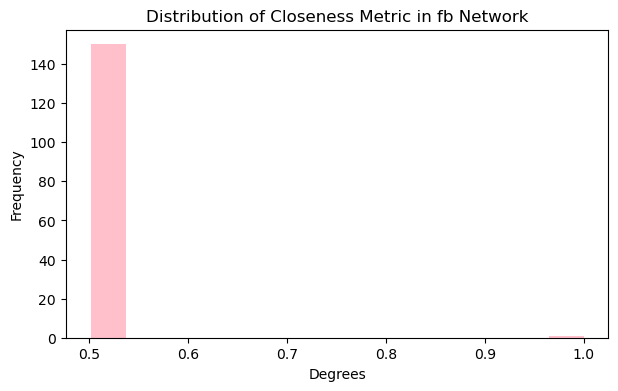

In [231]:
plt.figure(figsize=(7,4))
plt.hist(dict(d_cc).values(), 14, color = "pink")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness Metric in fb Network')

In [232]:
# Betweenness Centrality
d_bc = nx.betweenness_centrality(data)

In [241]:
d_bc_s = sorted_dict(d_bc)
d_bc_s[1:20]

[(1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0)]

In [234]:
d_bc_s[-1]

(150, 0.0)

In [235]:
# Eigenvector Centrality
d_ec = nx.eigenvector_centrality(data)

In [242]:
# Find the top ten
d_ec_s = sorted_dict(d_ec)
d_ec_s[1:20]

[(1, 0.05773540079490287),
 (2, 0.05773540079490287),
 (3, 0.05773540079490287),
 (4, 0.05773540079490287),
 (5, 0.05773540079490287),
 (6, 0.05773540079490287),
 (7, 0.05773540079490287),
 (8, 0.05773540079490287),
 (9, 0.05773540079490287),
 (10, 0.05773540079490287),
 (11, 0.05773540079490287),
 (12, 0.05773540079490287),
 (13, 0.05773540079490287),
 (14, 0.05773540079490287),
 (15, 0.05773540079490287),
 (16, 0.05773540079490287),
 (17, 0.05773540079490287),
 (18, 0.05773540079490287),
 (19, 0.05773540079490287)]

In [237]:
d_ec_s[-1]

(150, 0.05773540079490287)

In [243]:
# Grouping
names1 = [x[0] for x in ds[:20]]
names2 = [x[0] for x in d_cc_s[:20]]
names3 = [x[0] for x in d_bc_s[:20]]
names = list(set(names1) | set(names2) | set(names3))
data = [[name,d[name],d_cc[name],d_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['fb', 'Degree', 'Closeness', 'Betweenness'])




,fb,Degree,Closeness,Betweenness
0,0,150,1.000000,1.0
1,1,1,0.501672,0.0
2,2,1,0.501672,0.0
3,3,1,0.501672,0.0
4,4,1,0.501672,0.0
5,5,1,0.501672,0.0
6,6,1,0.501672,0.0
7,7,1,0.501672,0.0
8,8,1,0.501672,0.0
9,9,1,0.501672,0.0


In [244]:
# Identify 'Gray Cardinals'

names4 = [x[0] for x in d_ec_s[:20]]
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))
data = [[name,d[name],d_cc[name],d_bc[name],d_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['fb', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])


,fb,Degree,Closeness,Betweenness,Eigenvector


In [ ]:
# There are no 'Gray Cardinal'  in the top 10 & top 20 eigenvector centrality list .